# IPL SCore Prediction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("ipl.csv", parse_dates=["date"])
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
df.drop(['striker', 'non-striker', 'mid', 'batsman', 'bowler'], axis=1, inplace=True)
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            76014 non-null  datetime64[ns]
 1   venue           76014 non-null  object        
 2   bat_team        76014 non-null  object        
 3   bowl_team       76014 non-null  object        
 4   runs            76014 non-null  int64         
 5   wickets         76014 non-null  int64         
 6   overs           76014 non-null  float64       
 7   runs_last_5     76014 non-null  int64         
 8   wickets_last_5  76014 non-null  int64         
 9   total           76014 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 5.8+ MB


In [6]:
all_teams = df['bat_team'].unique()
all_teams

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [7]:
curr_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Sunrisers Hyderabad']

In [8]:
#to see most used stadiums
df['count'] = 1
df.groupby(['venue']).count()['count']

venue
Barabati Stadium                                         856
Brabourne Stadium                                       1380
Buffalo Park                                             380
De Beers Diamond Oval                                    368
Dr DY Patil Sports Academy                              2088
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     1113
Dubai International Cricket Stadium                      868
Eden Gardens                                            7049
Feroz Shah Kotla                                        7068
Green Park                                               492
Himachal Pradesh Cricket Association Stadium            1115
Holkar Cricket Stadium                                   617
JSCA International Stadium Complex                       837
Kingsmead                                               1731
M Chinnaswamy Stadium                                   7443
MA Chidambaram Stadium, Chepauk                         5972
Maharashtra Cricke

In [9]:
df.drop(['count'], axis=1, inplace=True)

In [10]:
curr_venues = ['M Chinnaswamy Stadium','Eden Gardens', 'Feroz Shah Kotla', 'MA Chidambaram Stadium, Chepauk',
       'Punjab Cricket Association Stadium, Mohali', 
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal']

In [11]:
# considering only current teams
df = df[(df['bat_team'].isin(curr_teams)) &(df['bowl_team'].isin(curr_teams))]
# considering only current venues
df = df[(df['venue'].isin(curr_venues))]
# tsking data after compleation of 5 overs
df = df[df['overs']>=5.0]

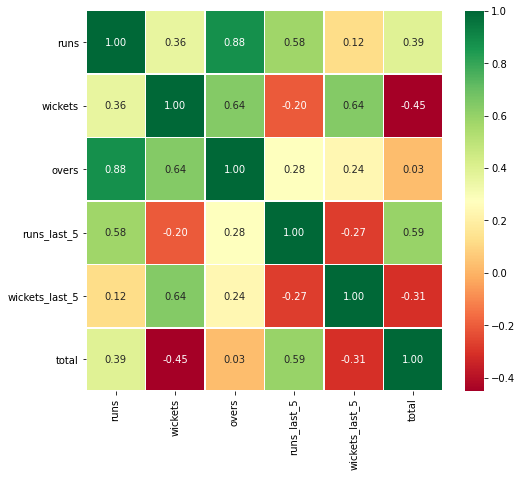

In [12]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(8, 7))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="RdYlGn");

## Data Preprocessing

In [13]:
# Find the columns which contains strings

for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

venue
bat_team
bowl_team


This will turn all the string values to categories
```
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()
```

```
pd.Categorical(df.venue).codes[2]
```

In [14]:
df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team', 'venue'])

In [15]:
#rearranging the columns
df = df[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla','venue_M Chinnaswamy Stadium',
       'venue_MA Chidambaram Stadium, Chepauk','venue_Sawai Mansingh Stadium',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Wankhede Stadium', 'overs','runs', 'wickets', 'runs_last_5', 'wickets_last_5',
       'total']]

df.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,venue_Sawai Mansingh Stadium,"venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.1,61,0,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.2,61,1,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.3,61,1,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.4,61,1,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.5,61,1,58,1,222


In [16]:
df.sort_values(by=["date"], inplace=True)
df.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,venue_Sawai Mansingh Stadium,"venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.1,61,0,59,0,222
98,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,15.5,158,2,56,1,222
97,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,15.4,157,2,55,1,222
96,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,15.3,157,2,59,1,222
95,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,15.2,155,2,57,1,222


In [17]:
df.to_csv("IPL_valid.csv", index=False)

In [18]:
X = df.drop(["total", "date"], axis=1)
y = df.total

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

## Building Model

### RandomForestRegressor

In [20]:
# random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 42)

In [21]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [22]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 800, num = 4)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 60, num = 6)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [200, 400, 600, 800],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [ ]:
model_rscv = RandomizedSearchCV(
    estimator=model,
    param_distributions=random_grid,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
model_rscv.fit(X_train, y_train)

In [148]:
model_rscv.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [150]:
y_pred = model_rscv.predict(X_test)

In [151]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error


def rmse(y_true, y_preds):
    return np.sqrt(mean_squared_error(y_true, y_preds))

def rmsle(y_true, y_preds):
    return np.sqrt(mean_squared_log_error(y_true, y_preds))

def show_scores(model):
    test_preds = model.predict(X_test)
    
    scores = {
        "Test MAE": mean_absolute_error(y_test, test_preds),
        "Test RMSLE": rmsle(y_test, test_preds),
        "Test RMSE": rmse(y_test, test_preds),
    }
    return scores

In [152]:
show_scores(model_rscv)

{'Test MAE': 13.50471920302918,
 'Test RMSLE': 0.11281177566540738,
 'Test RMSE': 18.00804773120373}

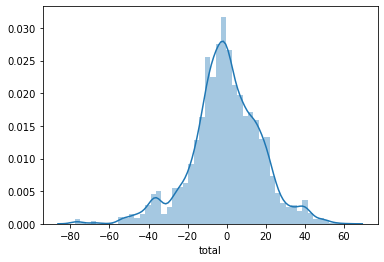

In [155]:
sns.distplot(y_test-y_pred);

In [157]:
model_rscv.score(X_test, y_test)

0.5881696388651562

### Lasso Regression

In [160]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}

lasso_model = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5).fit(X_train,y_train)

/home/kcdrathan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2664048.655872655, tolerance: 1590.0130525016386
  positive)
/home/kcdrathan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2858428.433071016, tolerance: 1697.4274986181663
  positive)
/home/kcdrathan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2790819.177755842, tolerance: 1709.1998389753667
  positive)
/home/kcdrathan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want 

In [162]:
lasso_model.best_params_

{'alpha': 1}

In [161]:
y_pred = lasso_model.predict(X_test)

In [165]:
show_scores(lasso_model)

{'Test MAE': 12.211880228545242,
 'Test RMSLE': 0.10308995565956164,
 'Test RMSE': 16.187281977765586}

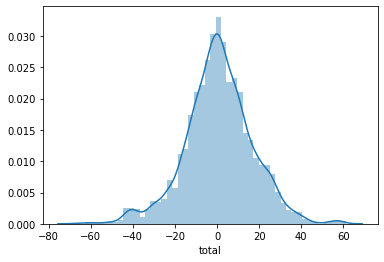

In [164]:
sns.distplot(y_test-y_pred);

In [166]:
lasso_model.score(X_test, y_test)

-262.0280978276945

## Creating a pickle file

In [169]:
import pickle as pkl

pkl.dump(lasso_model, open("score_prediction_lasso_model.pkl", 'wb'))